# Problem 1: Understanding supervised learning

I want you to think about an application from your own personal experience/ work where you can apply supervised learning. In particular, give an example of
1. Regression problem
2. Classification problem

##### your answer here:

1. Regression: Regression could be applied in Applied Behavior Analysis (ABA) to predict treatment outcomes based on various independent variables, such as session frequency, intervention type, or baseline behavior levels. For example, in my research on behavior interventions for autistic students, I could use multiple regression to model how intervention intensity (e.g., hours of ABA intervention per week) and baseline skill levels predict improvements in communication or adaptive behavior scores. By analyzing past data, regression allows for the estimation of expected outcomes given specific intervention parameters, helping practitioners make data-driven decisions about treatment planning and resource allocation.

2. Classification: I chose KNN specifically for this, but in ABA, classification algorithms like KNN could be used to predict whether a specific intervention will be successful for a given learner based on historical data. For example, using past intervention data, kNN could classify whether a child with autism is likely to benefit from a specific communication training program (e.g., PECS vs. verbal modeling) based on features such as baseline verbal ability, prior responsiveness to reinforcement, and engagement levels. By identifying patterns in similar cases, classification models can assist practitioners in selecting the most effective intervention strategies tailored to individual learner characteristics.









# Problem 2(a): Overfitting and Out of Sample error

Fill in the blanks

For the knn model, as the value of $k$ decreases, the training error decreases, but the testing error first decreases and then increases.

##### your answer here:
For the knn model, as the value of $k$ decreases, the training error decreases, but the testing error first decreases and then increases.

# Problem 2(b): Overfitting and out of sample error

Joe fits a statistical model to a dataset and finds that the root mean square error of the model for Training dataset is  $0.5$, whereas the root mean square error for the test dataset is $25$. Susan fits another model to the dataset and finds that the training RMSE is $30$ and the test RMSE is $32$. Ryan fits a model to the same dataset and finds that the training RMSE is $1.2$ and the teting RMSE is $1.5$. Your goal is to identify which of the 
models is (a) overfitting, (b) underfitting and (c) just right.

##### Your answer here:

Joe’s model is an example of overfitting because it has a very low RMSE on the training data (0.5) but a very high RMSE on the test data (25). This discrepancy indicates that the model is capturing noise in the training data rather than the true underlying pattern, leading to poor generalization. On the other hand, Susan’s model is an example of underfitting, as both her training RMSE (30) and test RMSE (32) are high. This suggests that the model is too simple and fails to learn meaningful patterns from the data. Finally, Ryan’s model appears to strike the right balance, with a training RMSE of 1.2 and a test RMSE of 1.5. Both values are low and close to each other, indicating that the model generalizes well and achieves an optimal balance between bias and variance, making it the best fit for the dataset.



In [116]:
# your answer here:

def linear_model(age):
    return 30000 + 200 * age

def quadratic_model(age):
    return 427 * (age ** 2) + 4026 * age - 49400

age_new = 30
observed_income = 45000

predicted_income_linear = linear_model(age_new)
predicted_income_quadratic = quadratic_model(age_new)

error_linear = abs(predicted_income_linear - observed_income)
error_quadratic = abs(predicted_income_quadratic - observed_income)

print(f"Predicted Income (Linear Model): ${predicted_income_linear:,}")
print(f"Predicted Income (Quadratic Model): ${predicted_income_quadratic:,}")
print(f"Error (Linear Model): ${error_linear:,}")
print(f"Error (Quadratic Model): ${error_quadratic:,}")

better_model = "Linear Model" if error_linear < error_quadratic else "Quadratic Model"
print(f"\nThe better model for this data point is: {better_model}")

Predicted Income (Linear Model): $36,000
Predicted Income (Quadratic Model): $455,680
Error (Linear Model): $9,000
Error (Quadratic Model): $410,680

The better model for this data point is: Linear Model


# Problem 2(c): Comparing two models
    
Our goal is to predict income as a function of age.

We fit two models: One is a straight line, and another is a quadratic equation to a collection of $n$ points

the equation for the line is:

`Income = 30000 + 200*age`

The quadratic equation is

`Income = 427*X^2 + 4026* X- 49400`

Now suppose a new data point comes in, that the model has not seen before. The age for this datapoint is (30) and the observed income is (45000)

Which of the two models is better at predicting the Income?


# Problem 3: Predicting income from education

In [118]:
# read the income dataset from the following url and print the first five rows of the dataframe
url = 'https://www.statlearning.com/s/Income1.csv'

import pandas as pd
url = 'https://www.statlearning.com/s/Income1.csv'
income_df = pd.read_csv(url)
print(income_df.head())

   Unnamed: 0  Education     Income
0           1  10.000000  26.658839
1           2  10.401338  27.306435
2           3  10.842809  22.132410
3           4  11.244147  21.169841
4           5  11.645485  15.192634


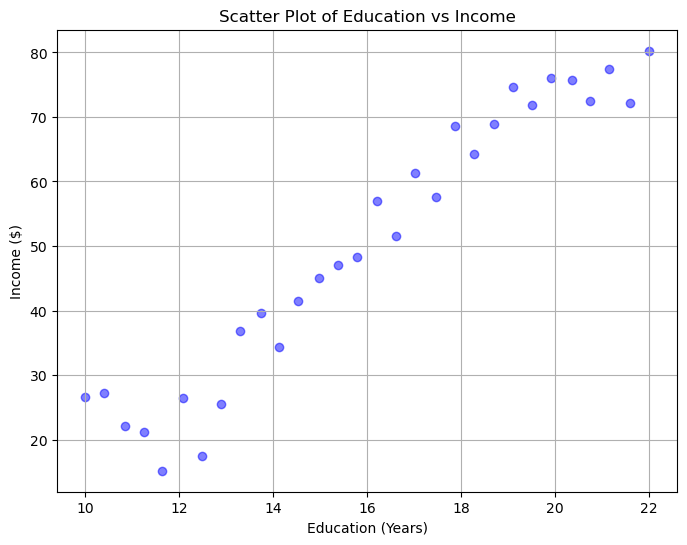

In [120]:
# Plot a scatter plot with education on x axis and income on y axis. Does the relationship look linear?
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(income_df['Education'], income_df['Income'], alpha=0.5, color='blue')
plt.xlabel('Education (Years)')
plt.ylabel('Income ($)')
plt.title('Scatter Plot of Education vs Income')
plt.grid(True)
plt.show()

# I would say that the relationship looks linear.

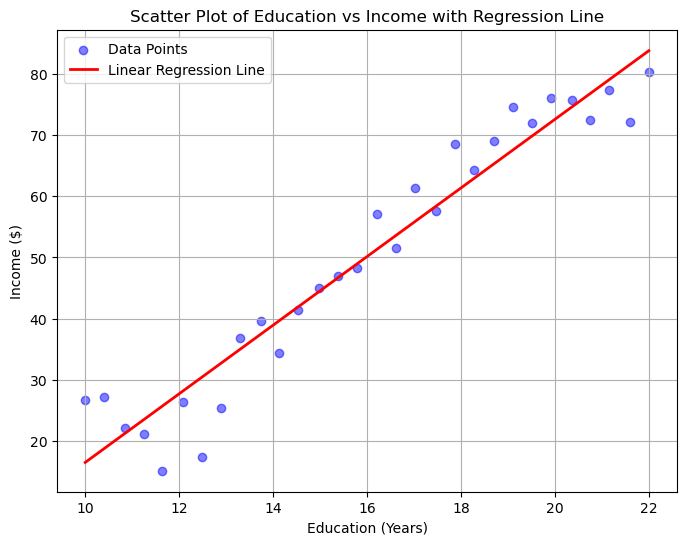

In [53]:
# Add a linear regression line to the plot
import numpy as np
X = income_df['Education']
Y = income_df['Income']

coeffs = np.polyfit(X, Y, deg=1)
linear_fit = np.poly1d(coeffs)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = linear_fit(X_fit)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, color='blue', label='Data Points')
plt.plot(X_fit, Y_fit, color='red', linewidth=2, label='Linear Regression Line')

plt.xlabel('Education (Years)')
plt.ylabel('Income ($)')
plt.title('Scatter Plot of Education vs Income with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Problem 4: Sacramento housing dataset

This is a dataset of about 900 houses that were sold in the Sacramento area in California. 
The goal is to predict the price of the house as a function of the area of the house as measured in square feet.


In [75]:
#read the dataset and print the first 5 rows of the dataset. 
url = 'https://support.spatialkey.com/wp-content/uploads/2021/02/Sacramentorealestatetransactions.csv'


#Explore the dataset and see what features are there. We are interested in predicting the price of the house from the area of the house

import pandas as pd

url = 'https://support.spatialkey.com/wp-content/uploads/2021/02/Sacramentorealestatetransactions.csv'
data = pd.read_csv(url)

print("First 5 rows of the dataset:")
print(data.head())

print("\nColumns in the dataset:")
print(data.columns)

print("\nDataset summary:")
print(data.info())

print("\nChecking if 'price' and 'area' related columns exist:")
print(data[['price', 'sq__ft']].head())


First 5 rows of the dataset:
             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  

Columns in the dataset:
Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', '

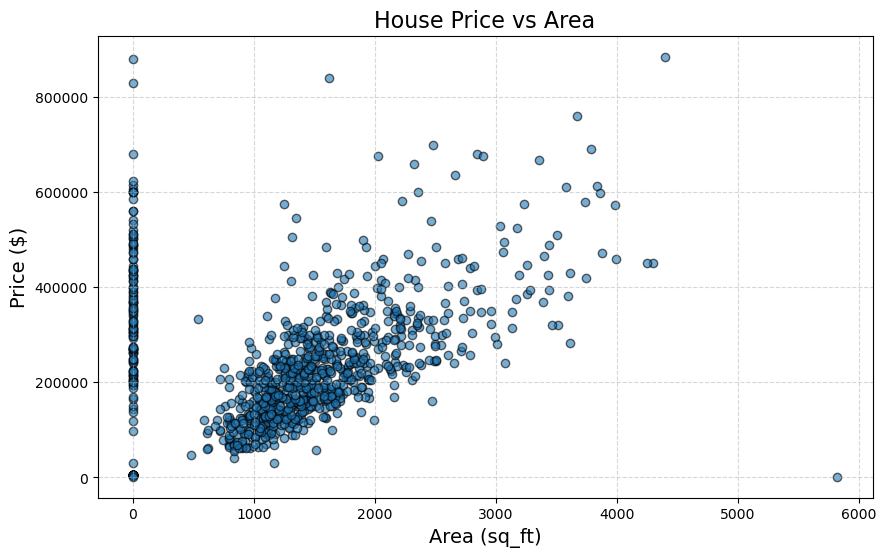

In [77]:
# Create a scatter plot with the area of the house on x axis and the price on the y axis. What trend do you see?

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['sq__ft'], data['price'], alpha=0.6, edgecolors='k')
plt.title('House Price vs Area', fontsize=16)
plt.xlabel('Area (sq_ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [79]:
# In the dataset, remove all the rows with area  = 0
#Hint: Use subsetting!

data = data[data['sq__ft'] != 0]

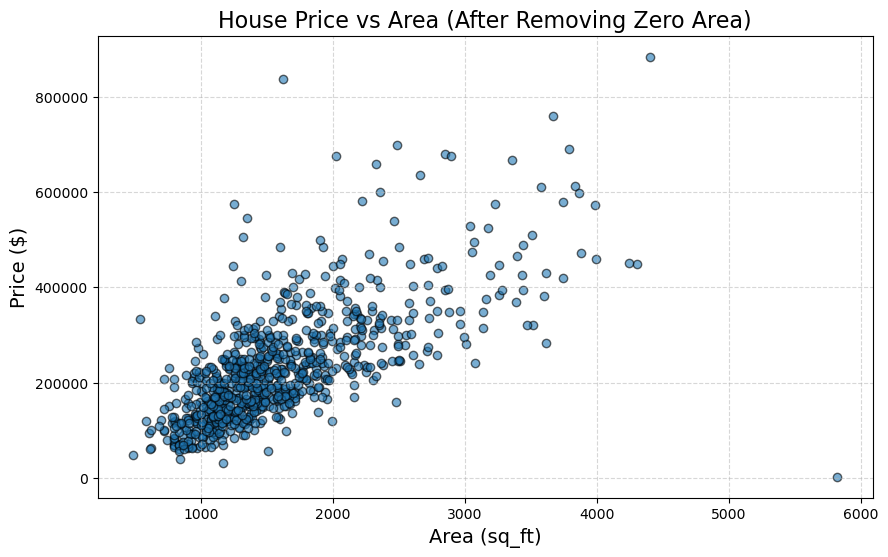

In [81]:
# Now recreate the scatter plot with the houses with 0 area removed. What difference do you see from the previous plot?

data = data[data['sq__ft'] != 0]

plt.figure(figsize=(10, 6))
plt.scatter(data['sq__ft'], data['price'], alpha=0.6, edgecolors='k')
plt.title('House Price vs Area (After Removing Zero Area)', fontsize=16)
plt.xlabel('Area (sq_ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Find the best 'k' by fitting several k-nearest neighbors from 2 to 200. Use the training and testing approach.


In [83]:
# import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [85]:
#divide the data into training and testing. Use 25 percent of the data for testing.
#Make sure to use only sq__ft for prediction. 
#You can either create a new dataframe with just sq__ft and price as the columns.

data_filtered = data[['sq__ft', 'price']]

X = data_filtered[['sq__ft']]
y = data_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
#compute the testing rmse for each k, k varying from 2 to 200

from sklearn.metrics import root_mean_squared_error

rmse_values = []

for k in range(2, 201):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmse_values.append((k, rmse))

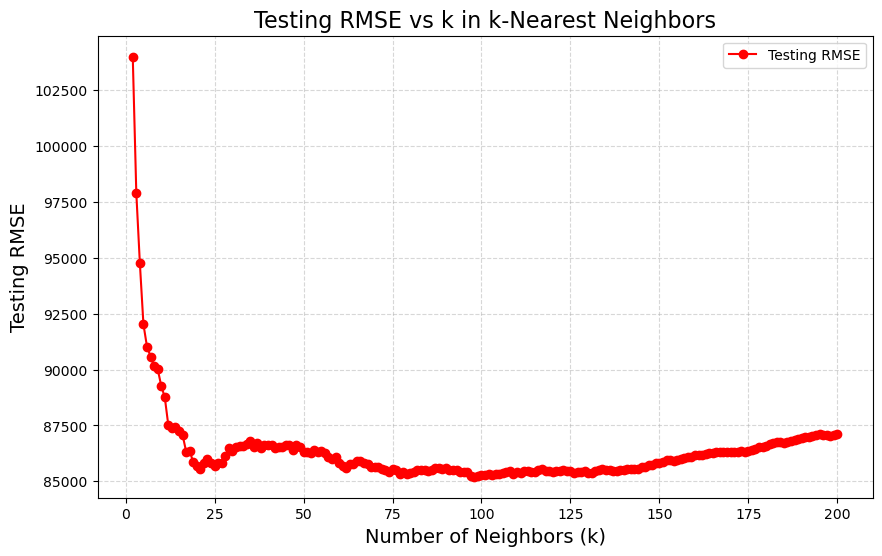

In [89]:
# plot the testing rmse vs k plot

k_values = [k for k, rmse in rmse_values]
rmse_scores = [rmse for k, rmse in rmse_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='red', label="Testing RMSE")
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Testing RMSE', fontsize=14)
plt.title('Testing RMSE vs k in k-Nearest Neighbors', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [73]:
# What is the behavior of the rmse as k increases?

print(
    "As k increases, the RMSE initially decreases as the model moves from overfitting to a better generalization, "
    "reducing variance while still capturing meaningful patterns. At very small values of k, the model is highly "
    "sensitive to individual data points, leading to high variance and a higher RMSE. As k reaches an optimal range, "
    "the RMSE is minimized, indicating a balance between bias and variance. However, as k continues to grow too large, "
    "the model begins averaging over too many neighbors, leading to excessive smoothing and underfitting, which causes "
    "the RMSE to increase again."
)


As k increases, the RMSE initially decreases as the model moves from overfitting to a better generalization, reducing variance while still capturing meaningful patterns. At very small values of k, the model is highly sensitive to individual data points, leading to high variance and a higher RMSE. As k reaches an optimal range, the RMSE is minimized, indicating a balance between bias and variance. However, as k continues to grow too large, the model begins averaging over too many neighbors, leading to excessive smoothing and underfitting, which causes the RMSE to increase again.


The best k is approximately: 98, with a minimum RMSE of 85205.09


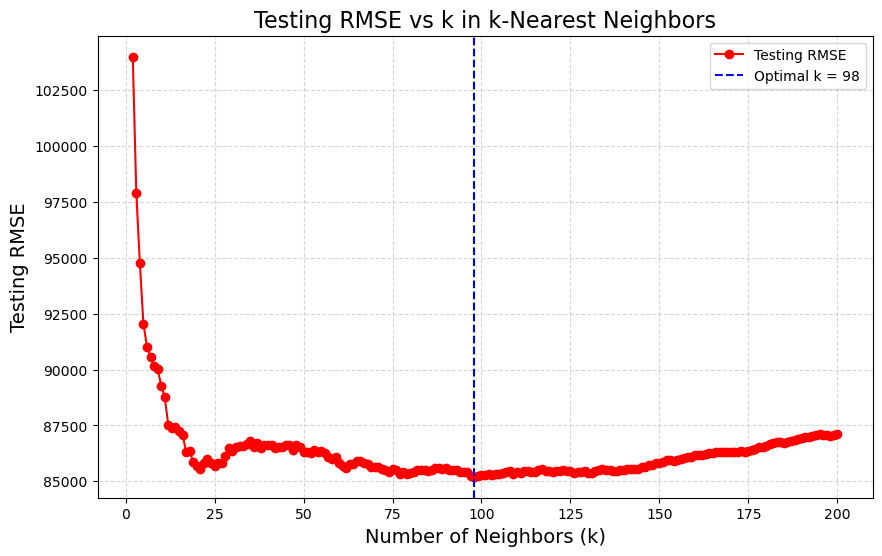

In [91]:
# What is the best k from the above plot? (approximate is ok)

k_values = [k for k, rmse in rmse_values]
rmse_scores = [rmse for k, rmse in rmse_values]

optimal_k_index = np.argmin(rmse_scores)
optimal_k = k_values[optimal_k_index]
min_rmse = rmse_scores[optimal_k_index]

print(f"The best k is approximately: {optimal_k}, with a minimum RMSE of {min_rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='red', label="Testing RMSE")
plt.axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Testing RMSE', fontsize=14)
plt.title('Testing RMSE vs k in k-Nearest Neighbors', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Problem 5: Distances in $k$- nearest neighbors

In this problem, we will learn about different types of distances between data points to find the nearest neighbor. These distances will also be useful when we learn unsupervised learning for clustering similar data points.

### Distances between continuous features: 
If all our features are continous, the most common distance measure used is the eucledian distance. We saw this in class. But there are some more nuances associated with the eucleadian distance that we will explore in this problem.

Suppose we have two data points $(u_1, \ldots, u_p)$ and $(v_1, \ldots, v_p)$. The eucledian distance between the two points is 

$$ \sqrt{(u_1-v_1)^2 + (u_2 - v_2)^2 + \ldots (u_p - v_p)^2}$$


In [96]:
# The following function calculates the eucledian distance
# between two points a and b.
from math import sqrt
 
# calculate euclidean distance
def euclidean_distance(a, b):
    return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

#example use
a = (1,2,1)
b = (1,1,1)

print(euclidean_distance(a,b))

1.0



Consider the following example dataset:

| id | income | age|
|-----|-------|-----|
| 1| 10000 | 30 |
| 2| 20000| 50 |
|3 | 25000| 50|

1. Calculate the eucledian distance between points 

- 1 and 2, 
- 1 and 3, and 
- 2 and 3

In [98]:
import numpy as np

point_1 = np.array([10000, 30])
point_2 = np.array([20000, 50])
point_3 = np.array([25000, 50])

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

dist_1_2 = euclidean_distance(point_1, point_2)
dist_1_3 = euclidean_distance(point_1, point_3)
dist_2_3 = euclidean_distance(point_2, point_3)

print(f"Euclidean Distance between Point 1 and Point 2: {dist_1_2:.4f}")
print(f"Euclidean Distance between Point 1 and Point 3: {dist_1_3:.4f}")
print(f"Euclidean Distance between Point 2 and Point 3: {dist_2_3:.4f}")


Euclidean Distance between Point 1 and Point 2: 10000.0200
Euclidean Distance between Point 1 and Point 3: 15000.0133
Euclidean Distance between Point 2 and Point 3: 5000.0000


2. Now calculate the distance between points 1 and 2 and 1 and 3. But this time use a scaled version of income, 
i.e. instead of income, use $income/1000$.

In [100]:
point_1 = np.array([10000 / 1000, 30])
point_2 = np.array([20000 / 1000, 50])
point_3 = np.array([25000 / 1000, 50])

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

dist_1_2_scaled = euclidean_distance(point_1, point_2)
dist_1_3_scaled = euclidean_distance(point_1, point_3)

print(f"Scaled Euclidean Distance between Point 1 and Point 2: {dist_1_2_scaled:.4f}")
print(f"Scaled Euclidean Distance between Point 1 and Point 3: {dist_1_3_scaled:.4f}")

Scaled Euclidean Distance between Point 1 and Point 2: 22.3607
Scaled Euclidean Distance between Point 1 and Point 3: 25.0000


Notice the difference between the distances when you scale the income vs when you dont scale the income! The example shows that the scale of the data is important when computing the distance! when you scale the income vs when you dont scale the income

There are generally two types of scaling of the data that is done before fitting any machine learning model

- Standard scaling - The data is scaled so that each feature has mean 0 and variance. This is the most common form of scaling. 

$$x_{scaled} = \frac{x - mean(x)}{std(x)}$$

- Max-min scaling - The data is scaled so that each feature lies between 0 and 1.

$$x_{scaled} = \frac{x - x_{\min}}{x_{\max} - x_{\min} }$$

- Robust scaling - This scaling is used when there are outliers in the data

Each of these scalings can be performed by using the `preprocessing` module in the sklearn library

Here's an example:

In [102]:
#import the neccessary libraries
from sklearn import preprocessing # the preprocessing library contains the scaling function
import numpy as np
# create a scaler variable that defines the standard scaler
scaler = preprocessing.StandardScaler()

# create a dummy feature vector
feature = np.array([[1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
print(feature)

# now we apply thr `fit_transform` function to transform the "feature" to compute the standardized deatures.
scaler.fit_transform(feature)

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

### We will apply this to the Boston Housing dataset and scale each feature

In [104]:
#Let us read the boston housing dataset into a pandas dataframe
import pandas as pd
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [106]:
# Create a copy of the dataframe
boston_scaled = boston.copy()
#Now scale each feature
for feature in boston_scaled.columns:
    boston_scaled[feature] = scaler.fit_transform(boston[[feature]])

In [108]:
#let us print the scaled dataset
boston_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [110]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now you can see the difference in the data after it has been scaled.

In [ ]:
# compute the summary statistics for the scaled Boston dataframe and the original dataframe and compare the two.

In [112]:
boston_scaled.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [114]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
